# Add annotations and final annots into sdata / Using cells

In [1]:
import scanpy as sc
import anndata as ad
import spatialdata as sd
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import to_rgba
from functools import partial
from matplotlib import colors

## 1. Get final labels

### 1.1. Get initial labels

In [2]:
def build_labels_table(adata_files, csv):
    
    combination_data = []
    
    if os.path.exists(csv):
        df_labels = pd.read_csv(csv)
    else:
        df_labels = pd.DataFrame(columns=['sample_id', 'tissue', 'label1', 'label2', 'label3', 'cell_count'])

    for file in adata_files:

        adata = ad.read_h5ad(file)
        file_name = os.path.basename(file)
        sample_id = file_name.replace('adata_annots_cells_', '').replace('.h5ad', '')
        tissue = sample_id.rsplit('_', 1)[0]
        print("Reading file: ", file_name)

        combination_counts = adata.obs.groupby(['label1', 'label2', 'label3'], observed=True).size().reset_index(name='cell_count')
        
        combination_counts['sample_id'] = sample_id
        combination_counts['tissue'] = tissue
        
        combination_counts = combination_counts[['sample_id', 'tissue', 'label1', 'label2', 'label3', 'cell_count']]
        combination_data.append(combination_counts)

    new_combination_df = pd.concat(combination_data, ignore_index=True)

    df_labels = pd.concat([df_labels, new_combination_df], ignore_index=True).drop_duplicates()
    df_labels.to_csv(csv, index=False)
    
    return df_labels

In [3]:
adata_dir = "/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells"
adata_files = [os.path.join(adata_dir, f) for f in os.listdir(adata_dir) if f.endswith('.h5ad')]
print(f"Number of adata files: {len(adata_files)}")
print(adata_files)

Number of adata files: 31
['/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_breast_s0.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_breast_s1.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_breast_s3.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_lung_s1.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_skin_s1.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_skin_s2.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_skin_s3.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_skin_s4.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_pancreatic_s0.h5ad', '/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_c

In [4]:
df_labels = build_labels_table(adata_files, '/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/annots/labels_table_cells.csv')

Reading file:  adata_annots_cells_breast_s0.h5ad
Reading file:  adata_annots_cells_breast_s1.h5ad
Reading file:  adata_annots_cells_breast_s3.h5ad
Reading file:  adata_annots_cells_lung_s1.h5ad
Reading file:  adata_annots_cells_skin_s1.h5ad
Reading file:  adata_annots_cells_skin_s2.h5ad
Reading file:  adata_annots_cells_skin_s3.h5ad
Reading file:  adata_annots_cells_skin_s4.h5ad
Reading file:  adata_annots_cells_pancreatic_s0.h5ad
Reading file:  adata_annots_cells_pancreatic_s1.h5ad
Reading file:  adata_annots_cells_pancreatic_s2.h5ad
Reading file:  adata_annots_cells_heart_s0.h5ad
Reading file:  adata_annots_cells_colon_s1.h5ad
Reading file:  adata_annots_cells_colon_s2.h5ad
Reading file:  adata_annots_cells_kidney_s0.h5ad
Reading file:  adata_annots_cells_kidney_s1.h5ad
Reading file:  adata_annots_cells_liver_s0.h5ad
Reading file:  adata_annots_cells_liver_s1.h5ad
Reading file:  adata_annots_cells_tonsil_s0.h5ad
Reading file:  adata_annots_cells_tonsil_s1.h5ad
Reading file:  adata_an

### 1.2. Transform into final labels

In [2]:
df_labels = pd.read_csv('/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/annots/labels_table_cells.csv')

In [5]:
df_labels

,sample_id,tissue,label1,label2,label3,cell_count
0,breast_s0,breast,Adipocyte,Adipocyte,normal_cell,5134
1,breast_s0,breast,B,B,normal_cell,16755
2,breast_s0,breast,Blood_vessel,Endothelial_Pericyte_Smooth_muscle,normal_cell,34260
3,breast_s0,breast,Epithelial,Mammary_basal_cell_(=myoepithelial),cancer_cell,26787
4,breast_s0,breast,Epithelial,Mammary_luminal_cell,cancer_cell,318468
...,...,...,...,...,...,...
298,breast_s6,breast,Mast,Mast,normal_cell,9647
299,breast_s6,breast,Monocyte/Macrophage/DC,Monocyte/Macrophage/DC,normal_cell,57529
300,breast_s6,breast,Myofibroblast,Myofibroblast,normal_cell,7559
301,breast_s6,breast,T,T,normal_cell,124383


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/seaborn/distributions.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


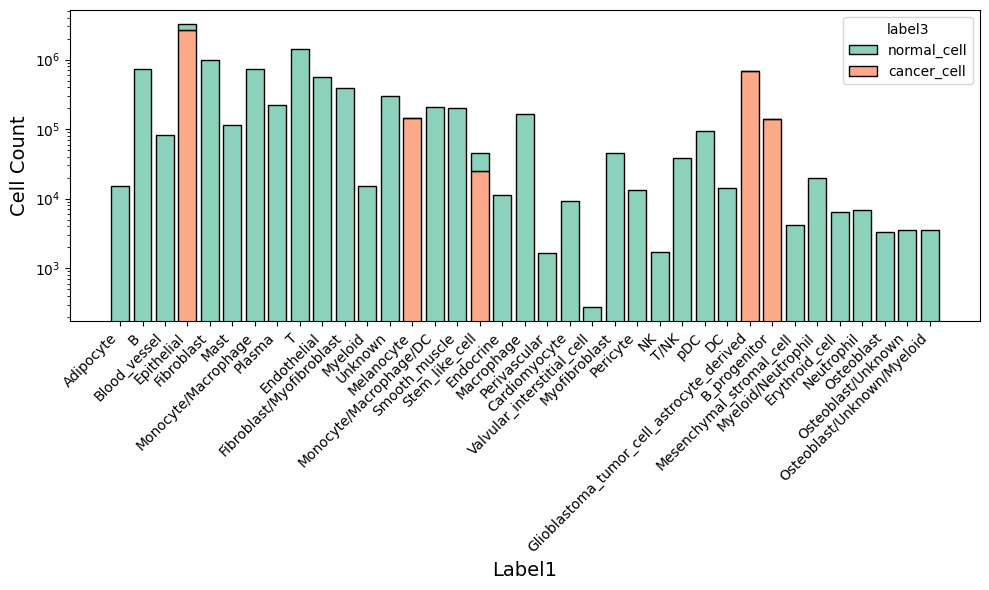

In [6]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_labels, 
             x='label1', 
             hue='label3', 
             weights='cell_count',  # Use the cell count for actual counts
             multiple='stack', 
             shrink=0.8, 
             palette='Set2')

plt.yscale('log')
plt.xlabel('Label1', fontsize=14)
plt.ylabel('Cell Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [7]:
group_labels = {

    # T/NK
    "T" : "T_NK",
    "T/NK" : "T_NK",
    "NK" : "T_NK",
    
    # B
    "B" : "B_Plasma",
    "B_blast" : "B_Plasma",
    "Proliferating_B_T" : "B_Plasma",
    "Plasma" : "B_Plasma",
    "B_progenitor" : "B_Plasma",
    
    # Monocyte/Macrophage/DC
    "Monocyte/Macrophage" : "Myeloid",
    "Monocyte/Macrophage/DC" : "Myeloid",
    "Macrophage" : "Myeloid",
    "DC" : "Myeloid",
    "Macrophage/DC" : "Myeloid",
    "Neutrophil" : "Myeloid",
    "Monocyte/Neutrophil" : "Myeloid",
    "Mast" : "Myeloid",
    "Myeloid" : "Myeloid",
    "Myeloid/Neutrophil" : "Myeloid",
    "pDC" : "Myeloid",  # not exactly true but convenient for now

    # Fibroblast/Myofibroblast
    "Fibroblast" : "Fibroblast_Myofibroblast",
    "Fibroblast/Myofibroblast" : "Fibroblast_Myofibroblast",
    "Mesenchymal_stromal_cell" : "Fibroblast_Myofibroblast",
    "Myofibroblast" : "Fibroblast_Myofibroblast",

    # Blood_vessel
    "Perivascular" : "Blood_vessel",
    "Smooth_muscle" : "Blood_vessel",
    "Pericyte" : "Blood_vessel",
    "Myofibroblast/Pericyte" : "Blood_vessel",
    "Endothelial" : "Blood_vessel",
    "Blood_vessel" : "Blood_vessel",
    
    # Epithelial
    "Epithelial" : "Epithelial",
    "Keratinocyte" : "Epithelial",

    # Melanocyte
    "Melanocyte" : "Melanocyte",
    "Melanoma" : "Melanocyte",

    # Stem_like
    "Cancer_cell_with_stem_like_properties" : "Stem_like",
    "Proliferating_leukemic_blast" : "Stem_like",
    "Proliferating_blast" : "Stem_like",
    "Cancer_stem_like_cells" : "Stem_like",
    "Stem_like_cell" : "Stem_like",

    # Glioblastoma
    "Glioblastoma_tumor_cell_astrocyte_derived" : "Glioblastoma",

    # Specialized
    "Erythroid_cell" : "Specialized",
    "Osteoclast" : "Specialized",
    "Osteoblast" : "Specialized",
    "Cardiomyocyte" : "Specialized",
    "Adipocyte" : "Specialized",
    "Endocrine" : "Specialized",
    "Valvular_interstitial_cell" : "Specialized",

    # Unknown
    "Unknown" : "Unknown",
    "ToRemove" : "Unknown",
    "Osteoblast/Unknown" : "Unknown",
    "Osteoblast/Unknown/Myeloid" : "Unknown",
}

In [8]:
df_labels['final_label'] = df_labels['label1'].map(group_labels)

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/seaborn/distributions.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


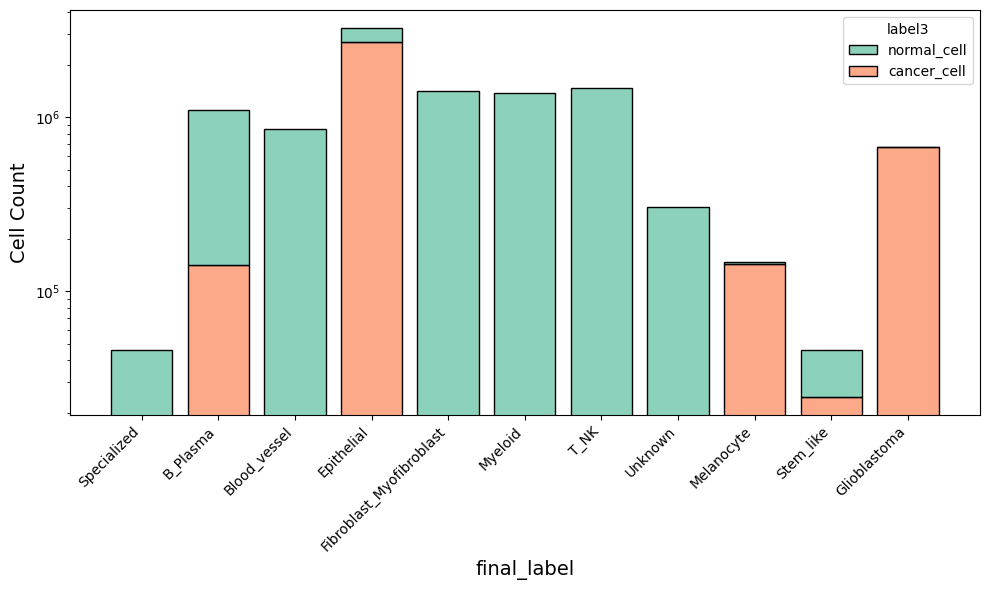

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_labels,
             x='final_label', 
             hue='label3', 
             weights='cell_count',  # Use the cell count for actual counts
             multiple='stack', 
             shrink=0.8, 
             palette='Set2')

plt.yscale('log')
plt.xlabel('final_label', fontsize=14)
plt.ylabel('Cell Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [10]:
# df_labels['final_label'] = df_labels.apply(
#     lambda row: f"{row['final_label']}_cancer" if row['label3'] == 'cancer_cell' else row['final_label'],
#     axis=1
# )

In [ ]:
# plt.figure(figsize=(12, 8))

# sns.histplot(data=df_labels,
#              x='final_label', 
#              hue='label3', 
#              weights='cell_count',  # Use the cell count for actual counts
#              multiple='stack', 
#              shrink=0.8, 
#              palette='Set2')

# plt.xlabel('final_label', fontsize=14)
# plt.ylabel('Cell Count', fontsize=14)
# plt.xticks(rotation=45, ha='right')

# plt.tight_layout()
# plt.show()

In [3]:
df_labels['final_label'].unique()

array(['Specialized', 'B_Plasma', 'Blood_vessel', 'Epithelial',
       'Fibroblast_Myofibroblast', 'Myeloid', 'T_NK', 'Unknown',
       'Melanocyte', 'Stem_like', 'Glioblastoma'], dtype=object)

In [4]:
df_labels["final_label"].value_counts()

final_label
Myeloid                     60
Epithelial                  58
Blood_vessel                45
Fibroblast_Myofibroblast    39
T_NK                        39
B_Plasma                    30
Unknown                     13
Specialized                  7
Melanocyte                   7
Stem_like                    3
Glioblastoma                 2
Name: count, dtype: int64

In [15]:
# dict_final = {
    
#     'T_NK' : 'T_NK',
#     'B' : 'B', 
#     'Plasma' : 'Plasma', 
#     'Myeloid' : 'Myeloid',
#     'pDC' : 'pDC',

#     'Fibroblast_Myofibroblast' : 'Fibroblast_Myofibroblast',
#     'Blood_vessel' : 'Blood_vessel', 
#     'Epithelial' : 'Epithelial',

#     'Epithelial_cancer' : 'Epithelial_cancer',
#     'Melanocyte_cancer' : 'Melanoma_cancer',
#     'B_cancer' : 'B_cancer', 
#     'Stem_like_cancer' : 'Stem_like_cancer', 
#     'Glioblastoma_cancer' : 'Glioblastoma_cancer',
        
#     'Specialized' : 'Specialized', 
#     'Melanocyte' : 'Specialized', 
                
#     'Unknown' : 'Unknown', 
# }

In [16]:
# df_labels['final_label'] = df_labels['final_label'].map(dict_final)

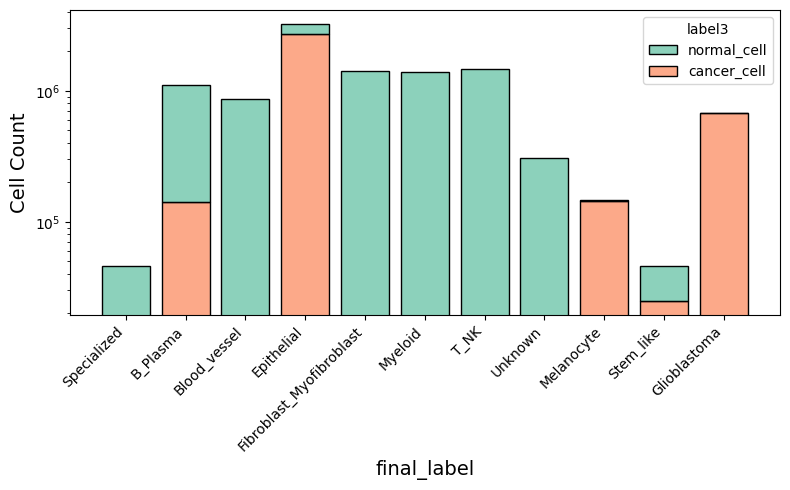

In [5]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df_labels,
             x='final_label', 
             hue='label3', 
             weights='cell_count',  # Use the cell count for actual counts
             multiple='stack', 
             shrink=0.8, 
             palette='Set2')

plt.yscale('log')
plt.xlabel('final_label', fontsize=14)
plt.ylabel('Cell Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [6]:
len(df_labels['final_label'].unique())

11

In [7]:
df_labels["final_label"].unique()

array(['Specialized', 'B_Plasma', 'Blood_vessel', 'Epithelial',
       'Fibroblast_Myofibroblast', 'Myeloid', 'T_NK', 'Unknown',
       'Melanocyte', 'Stem_like', 'Glioblastoma'], dtype=object)

In [8]:
# dict to put final label in each anndata

df_labels['combined_labels'] = df_labels[['label1', 'label2', 'label3']].astype(str).agg('_'.join, axis=1)
label_dict = df_labels.set_index('combined_labels')['final_label'].to_dict()
label_dict_unique = {k: v for k, v in label_dict.items()}
label_dict_unique

{'Adipocyte_Adipocyte_normal_cell': 'Specialized',
 'B_B_normal_cell': 'B_Plasma',
 'Blood_vessel_Endothelial_Pericyte_Smooth_muscle_normal_cell': 'Blood_vessel',
 'Epithelial_Mammary_basal_cell_(=myoepithelial)_cancer_cell': 'Epithelial',
 'Epithelial_Mammary_luminal_cell_cancer_cell': 'Epithelial',
 'Fibroblast_CAF_normal_cell': 'Fibroblast_Myofibroblast',
 'Mast_Mast_normal_cell': 'Myeloid',
 'Monocyte/Macrophage_Monocyte/Macrophage_normal_cell': 'Myeloid',
 'Plasma_Plasma_normal_cell': 'B_Plasma',
 'T_T_normal_cell': 'T_NK',
 'Endothelial_Angiogenic_endothelial_cell_normal_cell': 'Blood_vessel',
 'Epithelial_Proliferating_mammary_luminal_cell_cancer_cell': 'Epithelial',
 'Fibroblast/Myofibroblast_CAF_normal_cell': 'Fibroblast_Myofibroblast',
 'Epithelial_Mammary_basal_cell_cancer_cell': 'Epithelial',
 'T_Treg_normal_cell': 'T_NK',
 'Endothelial_Endothelial_normal_cell': 'Blood_vessel',
 'Epithelial_Lung_alveolar_epithelial_cell_normal_cell': 'Epithelial',
 'Epithelial_Lung_epitheli

In [9]:
label_dict_unique["less10_less10_less10"] = "Less10"

In [10]:
# Save dict label_dict_unique in json file
with open("/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/annots/label_dict_unique_cells.json", "w") as f:
    json.dump(label_dict_unique, f)

In [11]:
# Save df_labels in csv file
df_labels.to_csv('/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/annots/labels_table_cells.csv', index=False)

## 2. Analyze final dataset

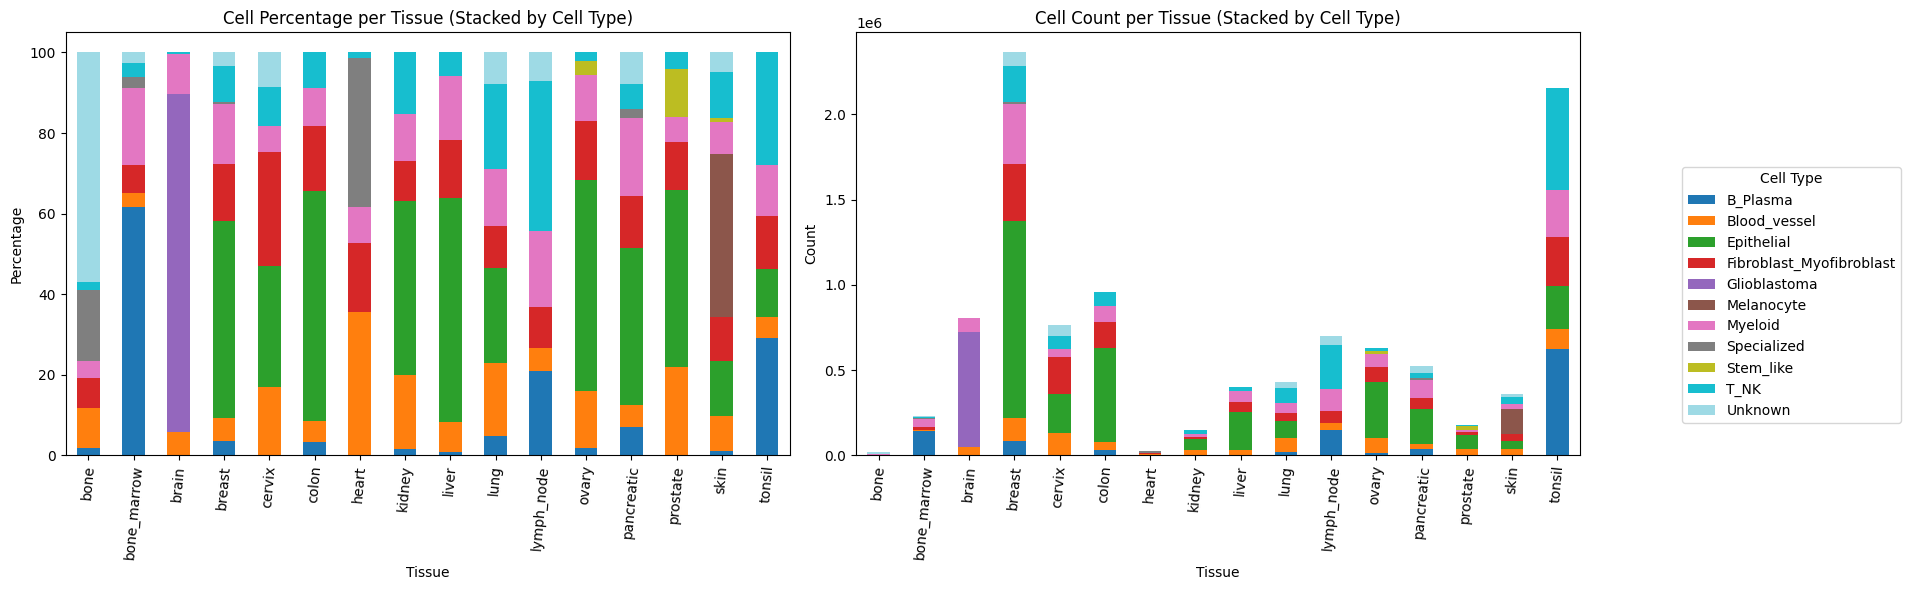

In [12]:
# Cell count per tissue, stacked by cell type

df_tissue_stacked = df_labels.pivot_table(index='tissue', columns='final_label', values='cell_count', aggfunc='sum', fill_value=0)
df_tissue_percentage = df_tissue_stacked.div(df_tissue_stacked.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar plot with percentages and log scale
df_tissue_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Tissue (Stacked by Cell Type)')
ax1.set_xlabel('Tissue')
ax1.set_ylabel('Percentage')
ax1.set_xticklabels(df_tissue_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with count
df_tissue_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Tissue (Stacked by Cell Type)')
ax2.set_xlabel('Tissue')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_tissue_stacked.index, rotation=85)

# Create a single legend and place it outside the plot
handles, labels = ax1.get_legend_handles_labels()  # Get the legend info from one of the plots
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout for clarity
plt.tight_layout()  # Leave space on the right for the legend
plt.show()

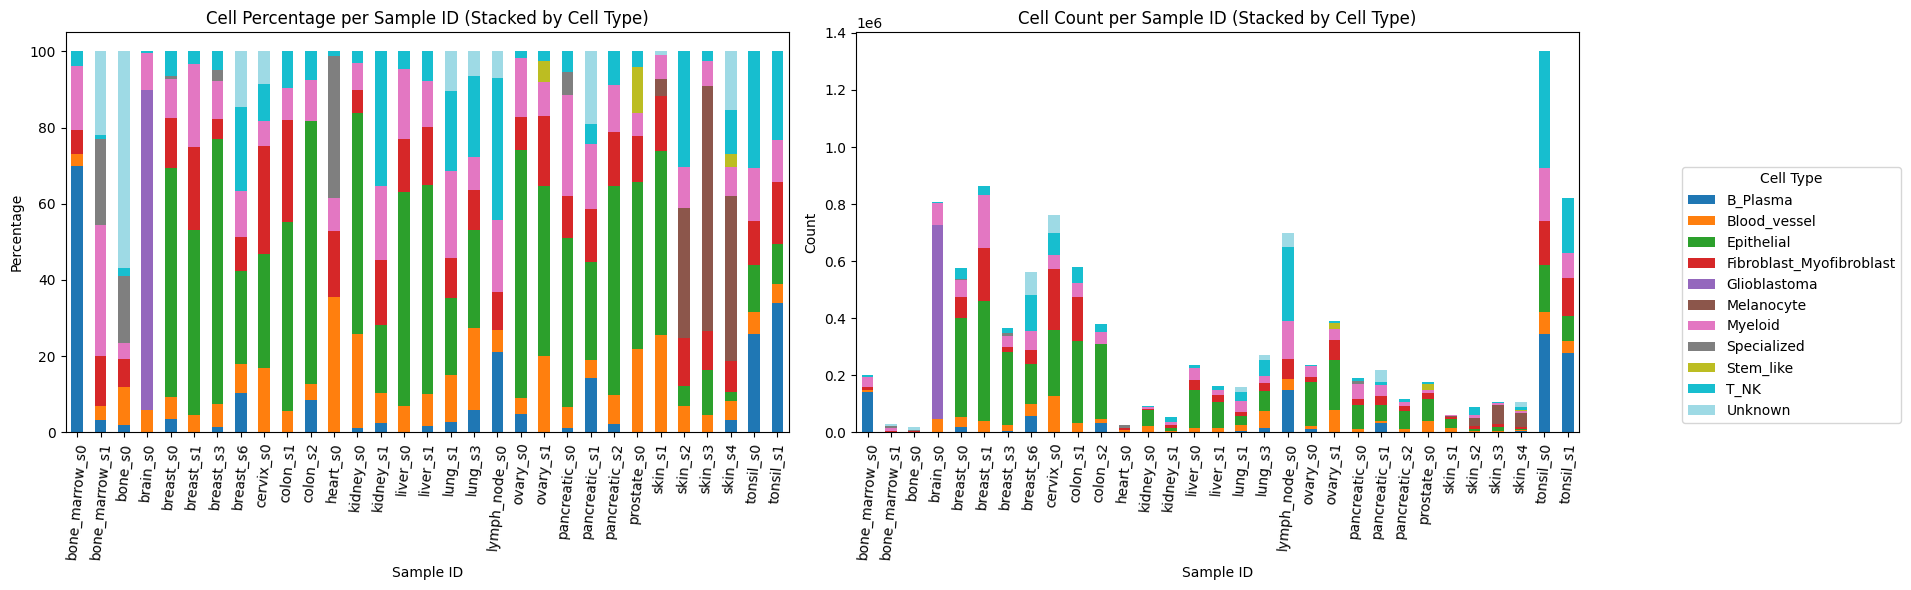

In [13]:
# Cell count per sample_id, stacked by cell type

df_sample_stacked = df_labels.pivot_table(index='sample_id', columns='final_label', values='cell_count', aggfunc='sum', fill_value=0)
df_sample_percentage = df_sample_stacked.div(df_sample_stacked.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar plot with percentages and log scale
df_sample_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Sample ID (Stacked by Cell Type)')
ax1.set_xlabel('Sample ID')
ax1.set_ylabel('Percentage')
ax1.set_xticklabels(df_sample_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with count
df_sample_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Sample ID (Stacked by Cell Type)')
ax2.set_xlabel('Sample ID')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_sample_stacked.index, rotation=85)

# Create a single legend and place it outside the plot
handles, labels = ax1.get_legend_handles_labels()  # Get the legend info from one of the plots
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Adjust layout for clarity
plt.tight_layout()  # Leave space on the right for the legend
plt.show()

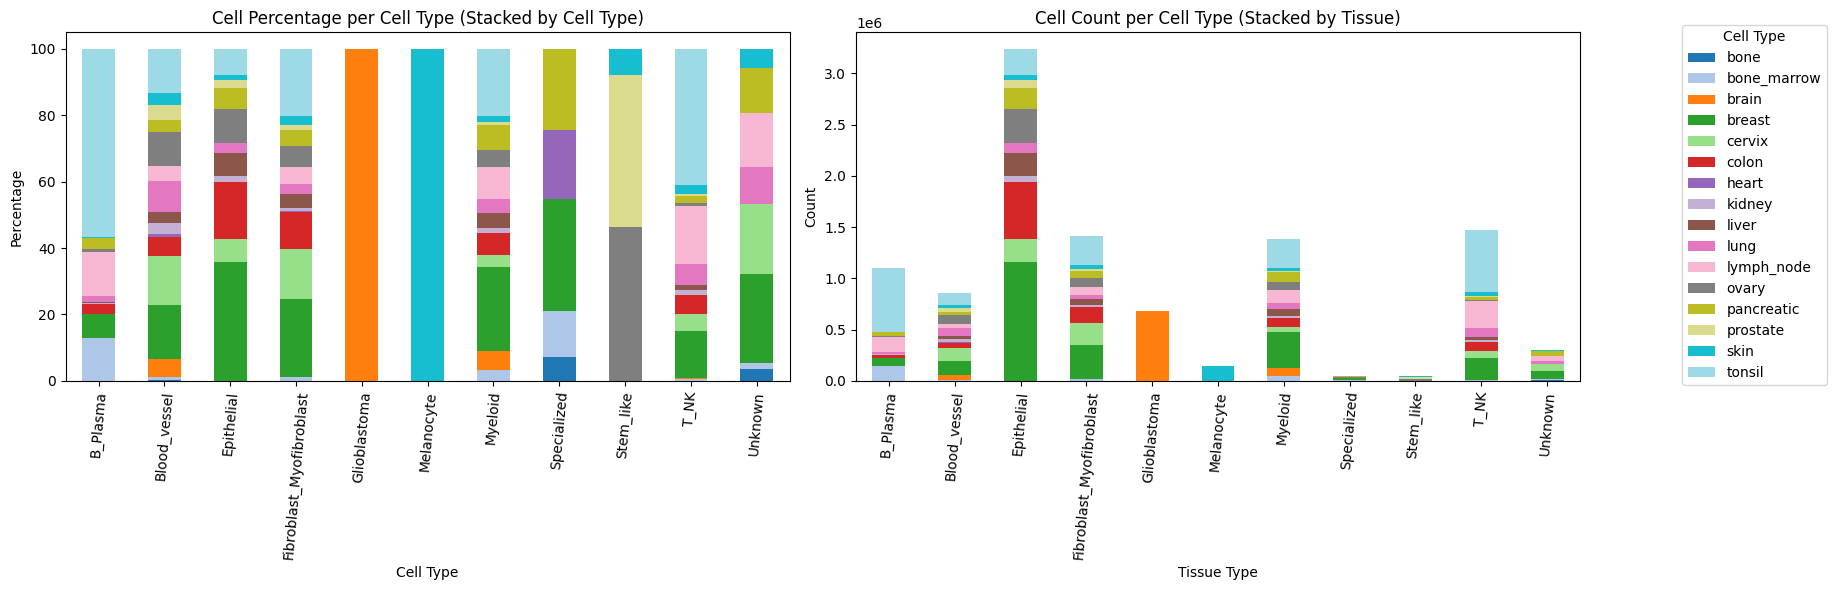

In [14]:
# Cell count per cell type, stacked by tissue

df_cell_type_stacked = df_labels.pivot_table(index='final_label', columns='tissue', values='cell_count', aggfunc='sum', fill_value=0)
df_cell_type_percentage = df_cell_type_stacked.div(df_cell_type_stacked.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar plot with percentages and log scale
df_cell_type_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Cell Type (Stacked by Cell Type)')
ax1.set_xlabel('Cell Type')
ax1.set_ylabel('Percentage')
ax1.set_xticklabels(df_cell_type_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with count
df_cell_type_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Cell Type (Stacked by Tissue)')
ax2.set_xlabel('Tissue Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_cell_type_stacked.index, rotation=85)

# Create a single legend and place it outside the plot
handles, labels = ax1.get_legend_handles_labels()  # Get the legend info from one of the plots
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.65), loc='center left')

# Adjust layout for clarity
plt.tight_layout()  # Leave space on the right for the legend
plt.show()

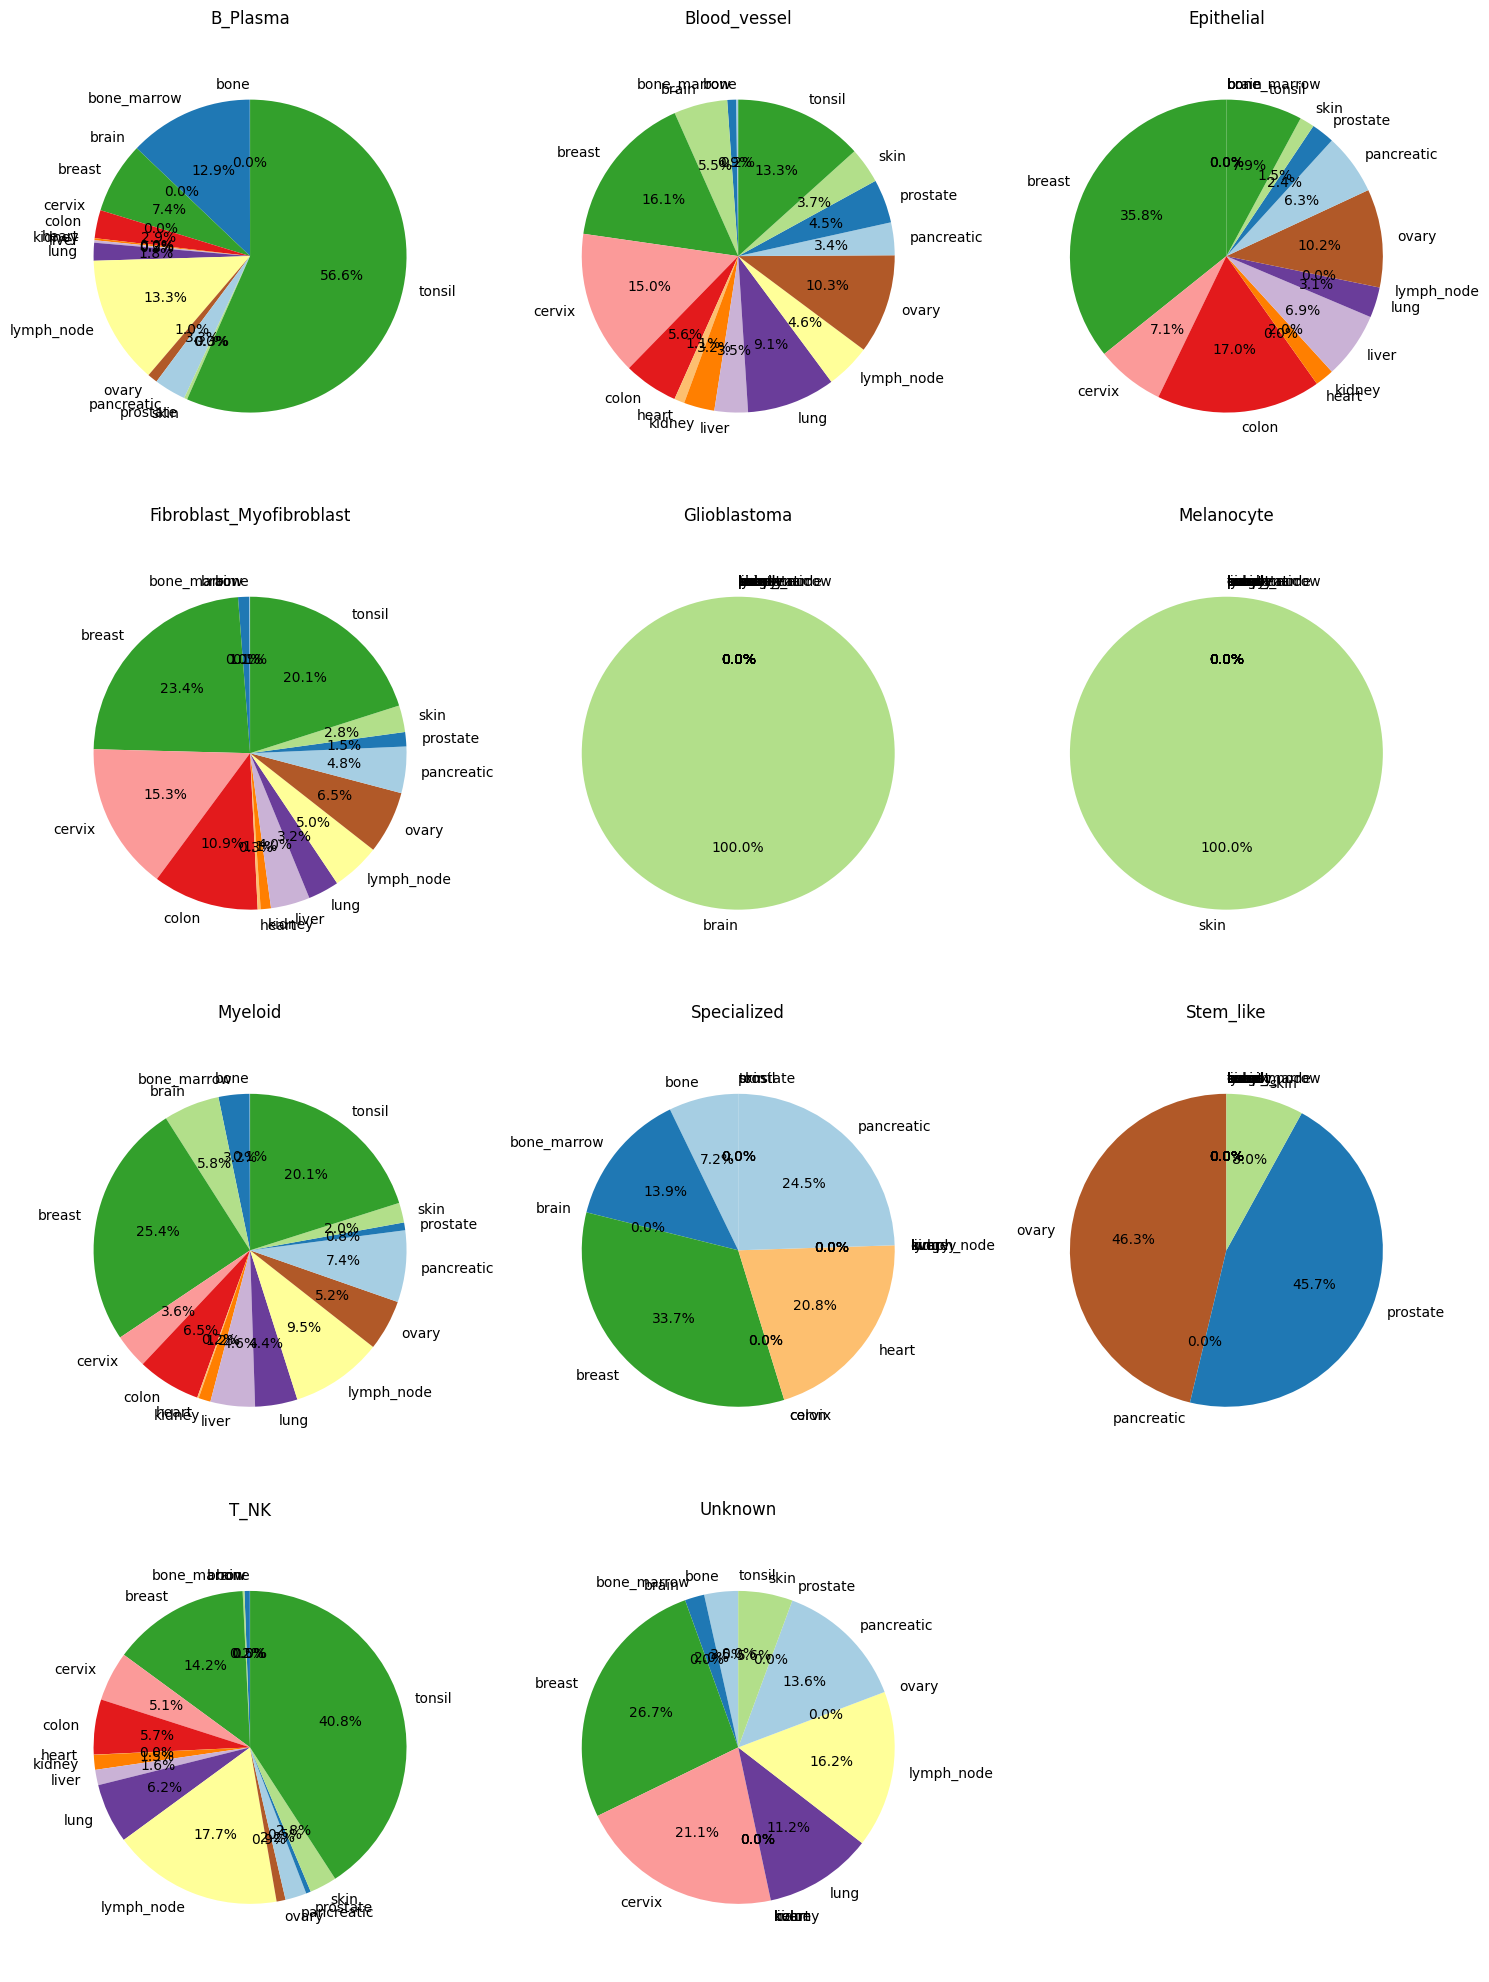

In [15]:
# Pie charts for tissue distribution in each cell type

df_grouped = df_labels.groupby(['final_label', 'tissue'])['cell_count'].sum().unstack(fill_value=0)

n_cell_types = len(df_grouped)
n_cols = 3 
n_rows = (n_cell_types // n_cols) + (n_cell_types % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, (cell_type, row) in enumerate(df_grouped.iterrows()):
    ax = axes[i]
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.set_title(f'{cell_type}')
    ax.axis('equal')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3. Apply final labels to each slide

In [2]:
# Load the label_dict_unique from the JSON file
with open('/Users/felicie-giraud-sauveur/Documents/HE2CellType/code/CT_DS/data/annots/label_dict_unique_cells.json', 'r') as f:
    label_dict_unique = json.load(f)

In [3]:
# print unique values in label_dict_unique
print(set(label_dict_unique.values()))

{'Fibroblast_Myofibroblast', 'Epithelial', 'Melanocyte', 'Blood_vessel', 'Less10', 'Specialized', 'B_Plasma', 'Unknown', 'Stem_like', 'Myeloid', 'T_NK', 'Glioblastoma'}


In [4]:
# Color for final label in Napari

to_hex = partial(colors.to_hex, keep_alpha=True)

# Normalize the RGB values to the range [0, 1] by dividing by 255
napari_color = {
                "T_NK": to_hex(to_rgba([255/255, 15/255, 15/255])[:3]),                      # Red
                "B_Plasma": to_hex(to_rgba([255/255, 143/255, 15/255])[:3]),                 # Orange
                "Myeloid": to_hex(to_rgba([255/255, 211/255, 15/255])[:3]),                  # Yellow
                "Blood_vessel": to_hex(to_rgba([70/255, 128/255, 0/255])[:3]),               # Dark Green
                "Fibroblast_Myofibroblast": to_hex(to_rgba([156/255, 255/255, 36/255])[:3]), # Light Green
                "Epithelial": to_hex(to_rgba([57/255, 208/255, 133/255])[:3]),               # Blue Green
                "Specialized": to_hex(to_rgba([69/255, 237/255, 255/255])[:3]),              # Turquoise
                "Melanocyte": to_hex(to_rgba([22/255, 169/255, 223/255])[:3]),               # Blue
                "Stem_like": to_hex(to_rgba([22/255, 69/255, 223/255])[:3]),                 # Dark Blue
                "Glioblastoma": to_hex(to_rgba([130/255, 55/255, 235/255])[:3]),             # Purple
                "Unknown": to_hex(to_rgba([0/255, 0/255, 0/255])[:3]),                       # Black
                "Less10": to_hex(to_rgba([143/255, 143/255, 143/255])[:3])                   # Grey
                }

In [11]:
def apply_final_labels(slide_id):

    print(f"\n===== Processing slide {slide_id} =====")

    print("* Reading adata_annot...")
    adata_annot = sc.read_h5ad(f"/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/adata_annots_cells/adata_annots_cells_{slide_id}.h5ad")
    print("* Reading sdata_final...")
    sdata_final = sd.read_zarr(f"/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables',))

    print("* Applying final labels...")
    adata_annot.obs['combined_labels'] = adata_annot.obs[['label1', 'label2', 'label3']].astype(str).agg('_'.join, axis=1)
    adata_annot.obs['final_label'] = adata_annot.obs['combined_labels'].map(label_dict_unique)
    a2s_final = dict(adata_annot.obs[['cell_id', 'final_label']].values)

    print("* Updating sdata_final...")

    sdata_final.tables['table_cells'].obs['final_label'] = sdata_final.tables['table_cells'].obs['cell_id'].map(a2s_final).fillna('Less10')

    sdata_final.tables['table_cells'].obs['label1'] = sdata_final.tables['table_cells'].obs['label1'].astype(str).fillna('Unknown')
    sdata_final.tables['table_cells'].obs['label2'] = sdata_final.tables['table_cells'].obs['label2'].astype(str).fillna('Unknown')
    sdata_final.tables['table_cells'].obs['label3'] = sdata_final.tables['table_cells'].obs['label3'].astype(str).fillna('Unknown')

    sdata_final.tables['table_cells'].obs['final_label'] = sdata_final.tables['table_cells'].obs['final_label'].replace('nan', 'Unknown')
    sdata_final.tables['table_cells'].obs['label1'] = sdata_final.tables['table_cells'].obs['label1'].replace('nan', 'Unknown')
    sdata_final.tables['table_cells'].obs['label2'] = sdata_final.tables['table_cells'].obs['label2'].replace('nan', 'Unknown')
    sdata_final.tables['table_cells'].obs['label3'] = sdata_final.tables['table_cells'].obs['label3'].replace('nan', 'Unknown')

    print("* Adding color for Napari viz for final labels...")
    sdata_final.tables['table_cells'].uns["final_label_colors"] = napari_color

    return sdata_final

In [12]:
slide_ids = ['breast_s0', 'breast_s1', 'breast_s3', 'breast_s6', 'lung_s1', 'lung_s3', 'skin_s1', 'skin_s2', 'skin_s3', 'skin_s4', 'pancreatic_s0', 
             'pancreatic_s1', 'pancreatic_s2', 'heart_s0', 'colon_s1', 'colon_s2', 'kidney_s0', 'kidney_s1', 'liver_s0', 'liver_s1', 'tonsil_s0',
             'tonsil_s1', 'lymph_node_s0', 'ovary_s0', 'ovary_s1', 'brain_s0', 'bone_marrow_s0', 'bone_marrow_s1', 'bone_s0', 'prostate_s0', 'cervix_s0']
len(slide_ids)

31

In [13]:
for slide_id in slide_ids:
    sdata_final = apply_final_labels(slide_id)
    print("* Saving...")
    sdata_final.delete_element_from_disk("table_cells")
    sdata_final.write_element("table_cells")


===== Processing slide breast_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide breast_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide breast_s3 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide breast_s6 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide lung_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide lung_s3 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide skin_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide skin_s2 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide skin_s3 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide skin_s4 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide pancreatic_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide pancreatic_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide pancreatic_s2 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide heart_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide colon_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide colon_s2 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide kidney_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide kidney_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide liver_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide liver_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide tonsil_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide tonsil_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide lymph_node_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide ovary_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide ovary_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide brain_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide bone_marrow_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide bone_marrow_s1 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide bone_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide prostate_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...

===== Processing slide cervix_s0 =====
* Reading adata_annot...
* Reading sdata_final...


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


* Applying final labels...
* Updating sdata_final...
* Adding color for Napari viz for final labels...
